In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0=pd.read_csv("train.csv")
l=d0["label"]
d=d0.drop("label",axis=1)

# 2d visualization using pca


In [2]:
labels=l.head(15000) #some sample of first 15k
data=d.head(15000)
print(data.shape)

(15000, 784)


In [4]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)


C:\Users\STUDENT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(15000, 784)


C:\Users\STUDENT\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
#covariance matrix
sample_data=standardized_data
covariance_matrix=np.matmul(sample_data.T ,sample_data)
print(covariance_matrix.shape)

(784, 784)


In [9]:
from scipy.linalg import eigh
values,vectors=eigh(covariance_matrix,eigvals=(782,783))
print(vectors.shape)
vectors=vectors.T #converting to(2,d) for future operations
print(vectors.shape)

(784, 2)
(2, 784)


In [11]:
new_cordinates=np.matmul(vectors,sample_data.T)
#vecotrs(2,784) and sample_data(784,15000) o/p is(2,15000)
import pandas as pd
import matplotlib.pyplot as plt
#APPENDIN LABEL TO IT
new=np.vstack((new_cordinates,labels)).T
dataframe=pd.DataFrame(data=new,columns=["1st_principal","2nd_principal","label"])




In [ ]:
import seaborn as sns
sns.FacetGrid(dataframe,hue="label",height=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()

# pca Using scikit-learn 

In [16]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print(pca_data.shape)

(15000, 2)


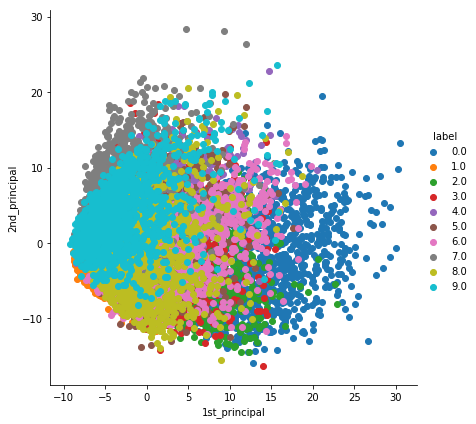

In [17]:
new=np.vstack((pca_data.T,labels)).T
dataframe=pd.DataFrame(data=new,columns=["1st_principal","2nd_principal","label"])
sns.FacetGrid(dataframe,hue="label",height=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()